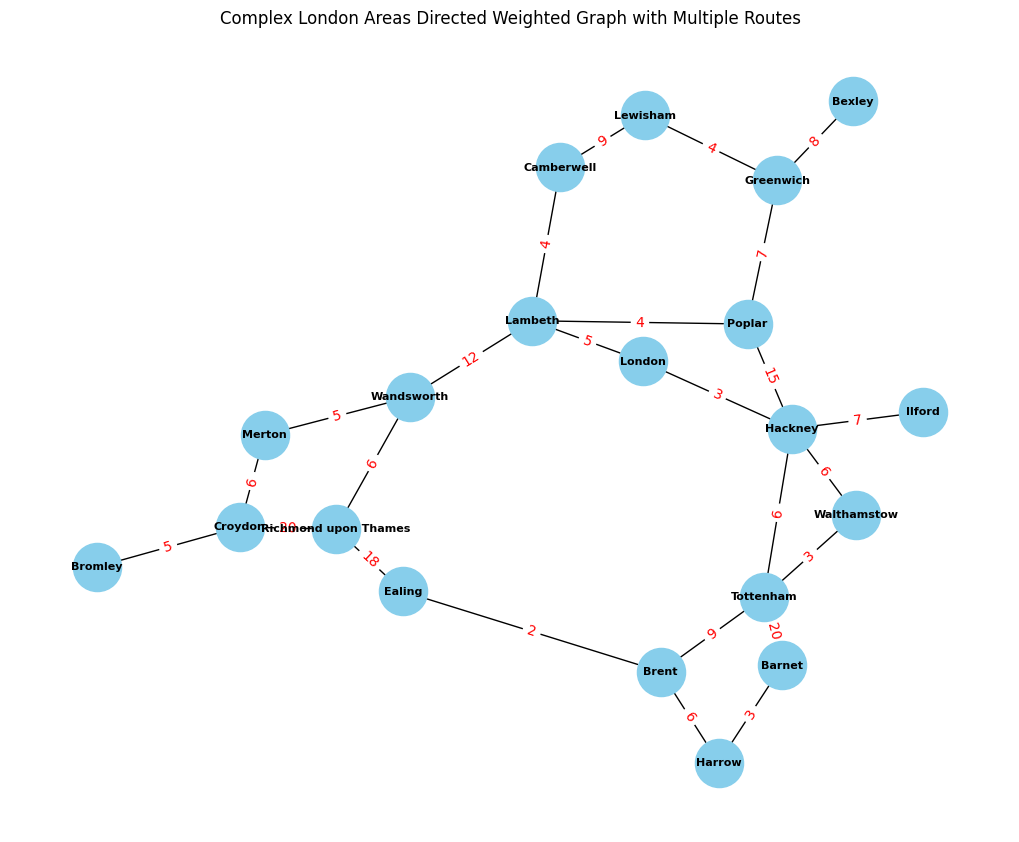

In [131]:
import networkx as nx
import matplotlib.pyplot as plt 
import queue
import random

G = nx.Graph()

areas = [
    "Harrow", "Brent", "Ealing", "Richmond upon Thames", "Wandsworth", "Lambeth", "Camberwell", "Lewisham",
    "Bexley", "Bromley", "Croydon", "Merton", "Greenwich", "Poplar", "Hackney",
    "Ilford", "Tottenham", "Walthamstow", "Barnet", "London"
]

G.add_nodes_from(areas)


edges = [
    # Primary routes
    ("Harrow", "Brent", 8), ("Brent", "Ealing", 5), ("Ealing", "Richmond upon Thames", 18),
    ("Richmond upon Thames", "Wandsworth", 6), ("Wandsworth", "Lambeth", 12),
    ("Lambeth", "Camberwell", 4), ("Camberwell", "Lewisham", 14), ("Lewisham", "Greenwich", 3),
    ("Greenwich", "Poplar", 9), ("Poplar", "Hackney", 15), ("Hackney", "Ilford", 7),
    ("Tottenham", "Walthamstow", 3), ("Walthamstow", "Hackney", 6),
    ("Hackney", "London", 2), ("London", "Lambeth", 5),
    ("Barnet", "Tottenham", 20), ("Bromley", "Croydon", 4), ("Croydon", "Merton", 10),
    ("Merton", "Wandsworth", 5), ("Bexley", "Greenwich", 8),
    ("Brent", "Harrow", 6), ("Lewisham", "Camberwell", 9), ("Greenwich", "Lewisham", 4),
    ("London", "Hackney", 3), ("Barnet", "Harrow", 3),
    ("Croydon", "Bromley", 5), ("Merton", "Croydon", 6), ("Poplar", "Greenwich", 7),
    ("Ealing", "Brent", 2), ("Brent", "Tottenham", 9), ("Hackney", "Tottenham", 6),
    ("Croydon", "Richmond upon Thames", 20),    ('Lambeth','Poplar', 4)

]


G.add_weighted_edges_from(edges)


pos = nx.spring_layout(G, seed=55) 
plt.figure(figsize=(10, 8))

# Draw nodes and edges
nx.draw(
    G, pos, with_labels=True, node_size=1200,
    node_color="skyblue", font_size=8, font_weight="bold", arrows=True,
)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color="red")

plt.title("Complex London Areas Directed Weighted Graph with Multiple Routes")
plt.show()


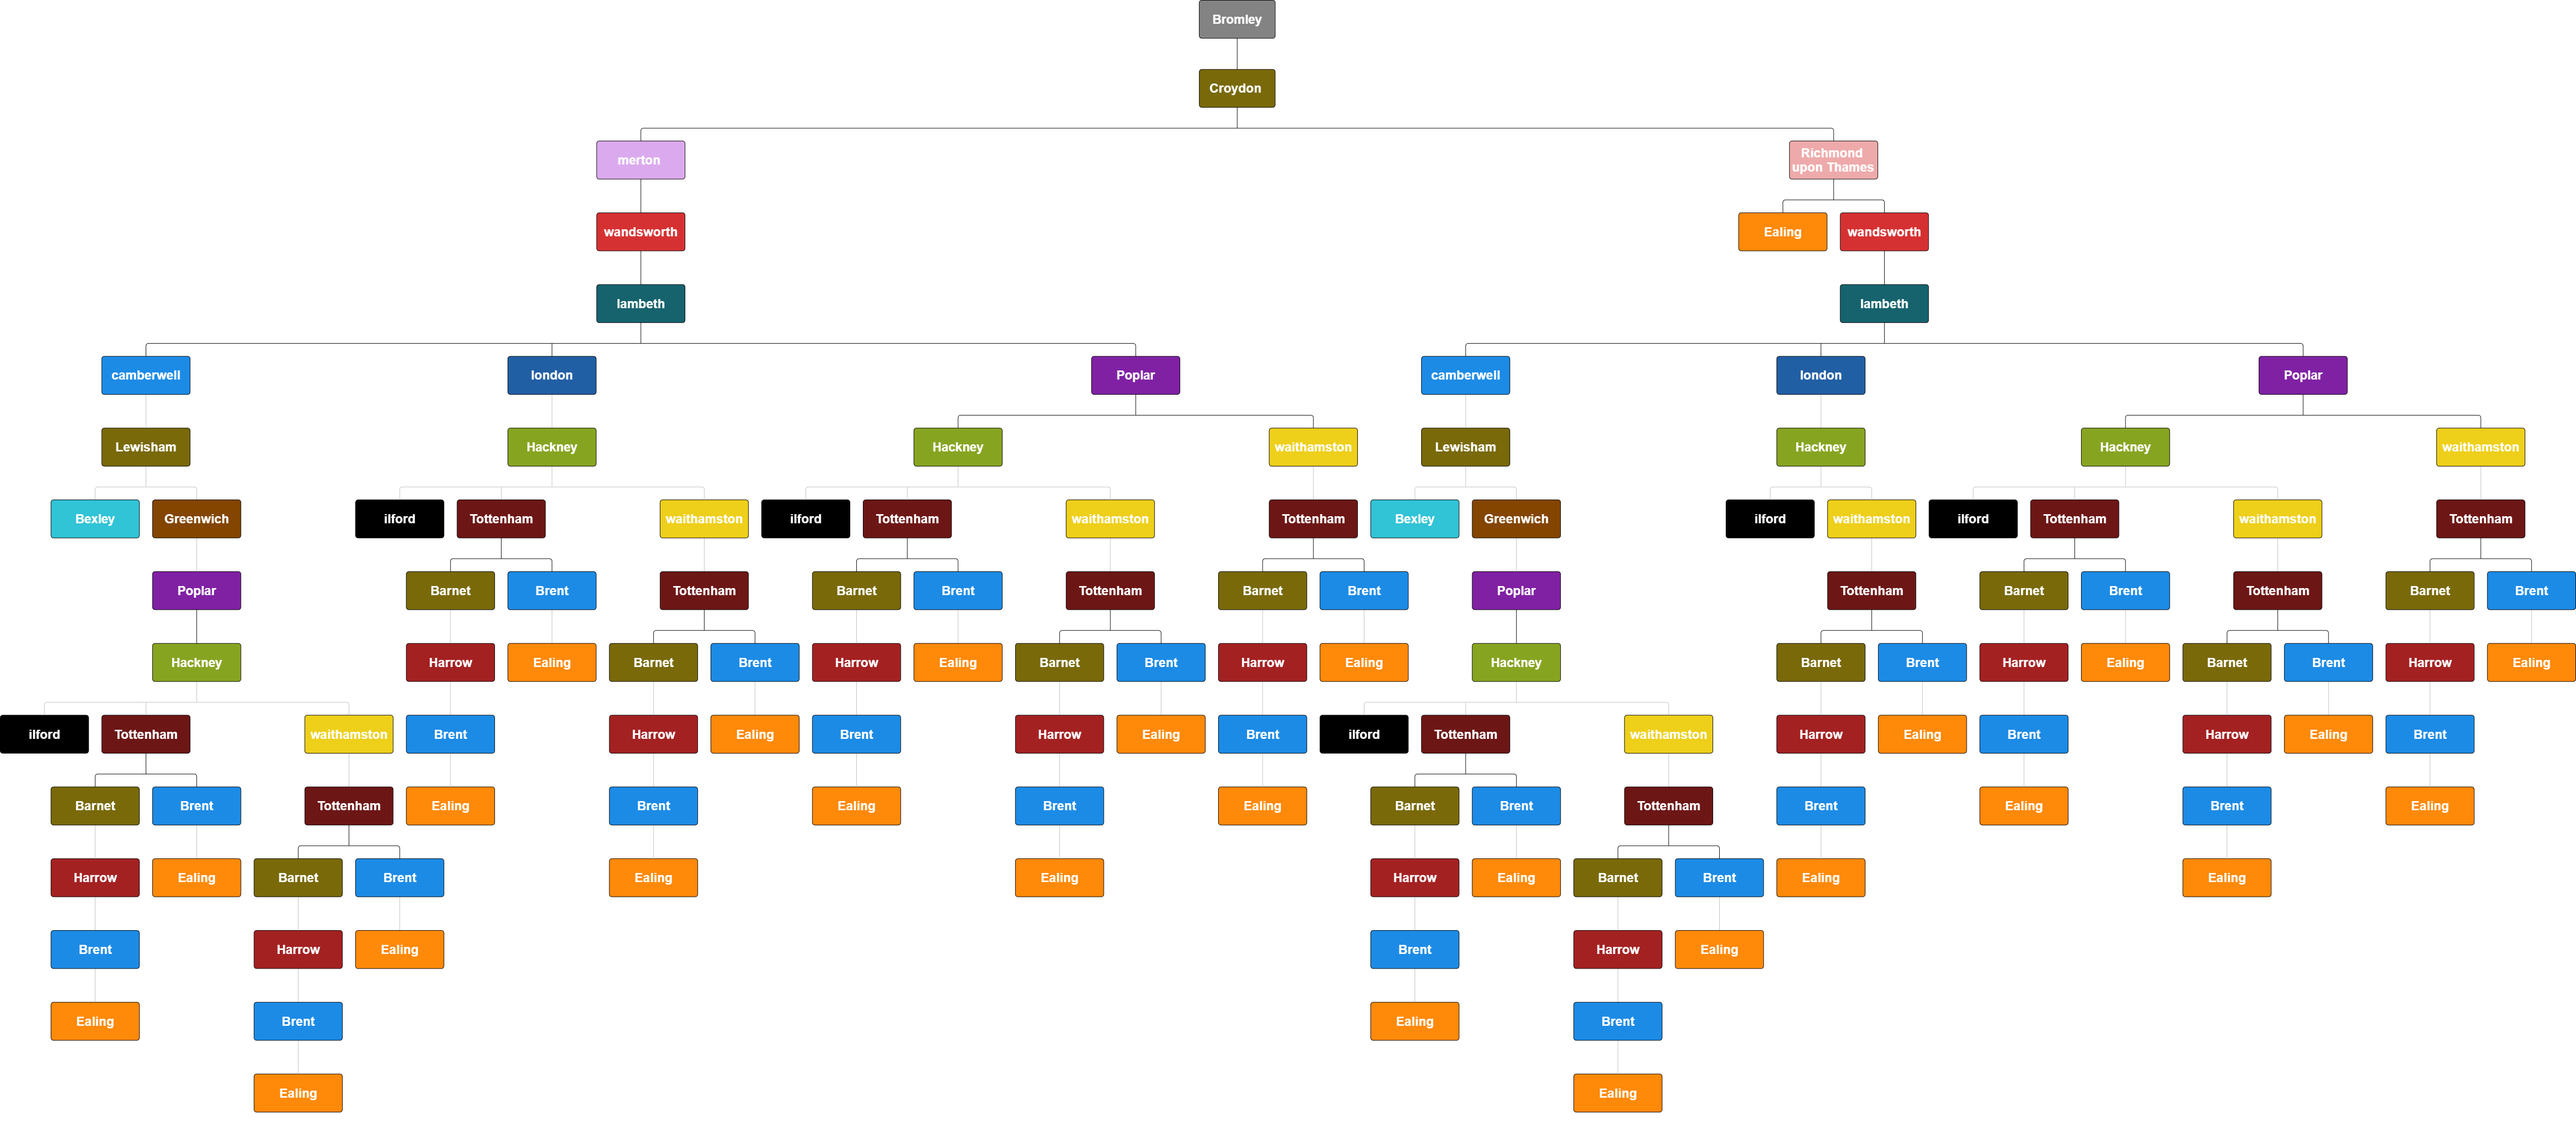

In [132]:
class Node:
    def __init__(self, name, path):
        self.name = name
        self.path = path
    

In [133]:
def create_and_draw_graph(path):
    if path == 'NOT FOUND' or path == 'The Start is not in the Graph':
        print("Invalid path provided.")
        return
    
    edges_in_path = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    reversed_edges_in_path = [(path[i + 1], path[i]) for i in range(len(path) - 1)]
    
    edge_colors = []
    for edge in G.edges:
        if edge in edges_in_path or edge in reversed_edges_in_path:
            edge_colors.append('red')  
        else:
            edge_colors.append('black')  

    pos = nx.spring_layout(G, seed=55)  
    plt.figure(figsize=(12, 10))
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color='skyblue',
        node_size=1800,
        font_size=10,
        font_weight='bold',
        edge_color=edge_colors, 
        width=3,
        arrows=True,
    )
    
    
    labels = nx.get_edge_attributes(G, 'weight') 
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color="green", font_weight='bold')
    
    plt.title("The Selected Route", fontsize=14)
    plt.show()


In [134]:
def uniform_cost_search(G, start, goal):
    if start not in G.nodes:
        return 'The Start is not in the Graph'
    priority_queue = queue.PriorityQueue()
    node = Node(start, [start])
    fakeCost = random.random()
    priority_queue.put( (0, fakeCost,node) )
    
    while not priority_queue.empty():
        cumulative_cost, _, node = priority_queue.get()
        
        if node.name == goal:
                return node.path
        else:
            for item in G.neighbors(node.name):
                if item not in node.path:
                    node_path = node.path + [item]
                    neighbor_node = Node(item, node_path)
                    
                    edge_cost = G[node.name][item]['weight'] 
                    cost = cumulative_cost + edge_cost 
                    fakeCost = random.random()
                    priority_queue.put( (cost, fakeCost, neighbor_node) )
    return 'NOT FOUND'



['Bromley', 'Croydon', 'Merton', 'Wandsworth', 'Richmond upon Thames', 'Ealing']


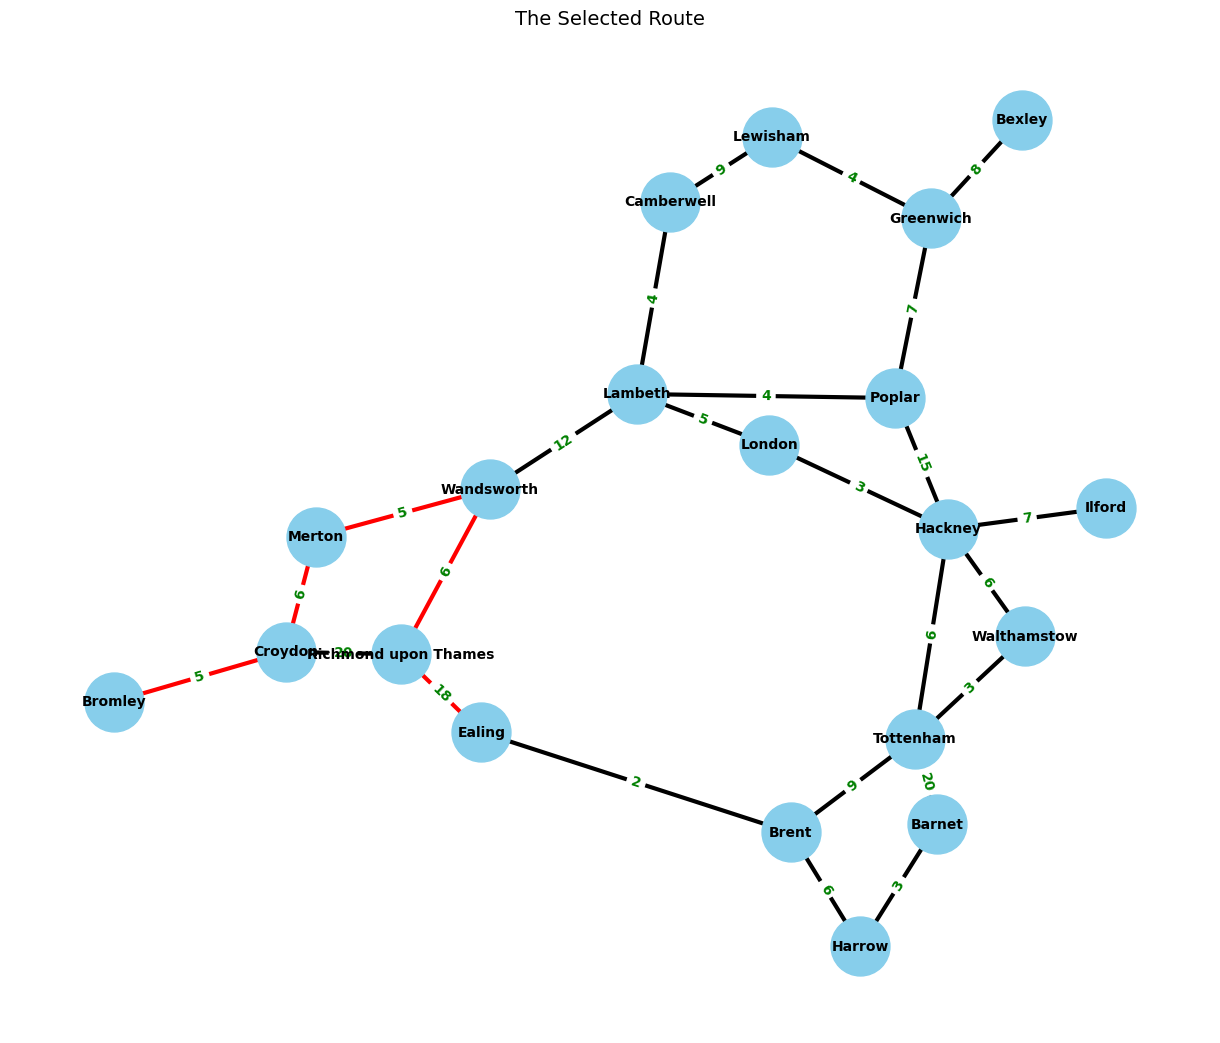

In [135]:
print(uniform_cost_search(G, 'Bromley', 'Ealing'))
create_and_draw_graph(uniform_cost_search(G, 'Bromley', 'Ealing'))

In [136]:
def depth_first_search_visited(graph, start, goal):
    if start not in G.nodes:
        return 'The Start is not in the Graph' 
    node = Node(start, [start])
    stack_list = [node]
    
    while stack_list != []:
        node = stack_list.pop()
        
        if node.name == goal:
            return node.path
        else:
            stack_children = []
            for item in graph.neighbors(node.name):
                if item not in node.path: 
                    node_path = node.path + [item] 
                    neighbor_node = Node(item, node_path)
                    stack_children.append(neighbor_node) 

            stack_list.extend(
                sorted(stack_children,key=lambda x:x.name, reverse=True))
            
    return 'NOT FOUND'

['Bromley', 'Croydon', 'Merton', 'Wandsworth', 'Lambeth', 'Camberwell', 'Lewisham', 'Greenwich', 'Poplar', 'Hackney', 'Tottenham', 'Barnet', 'Harrow', 'Brent', 'Ealing']


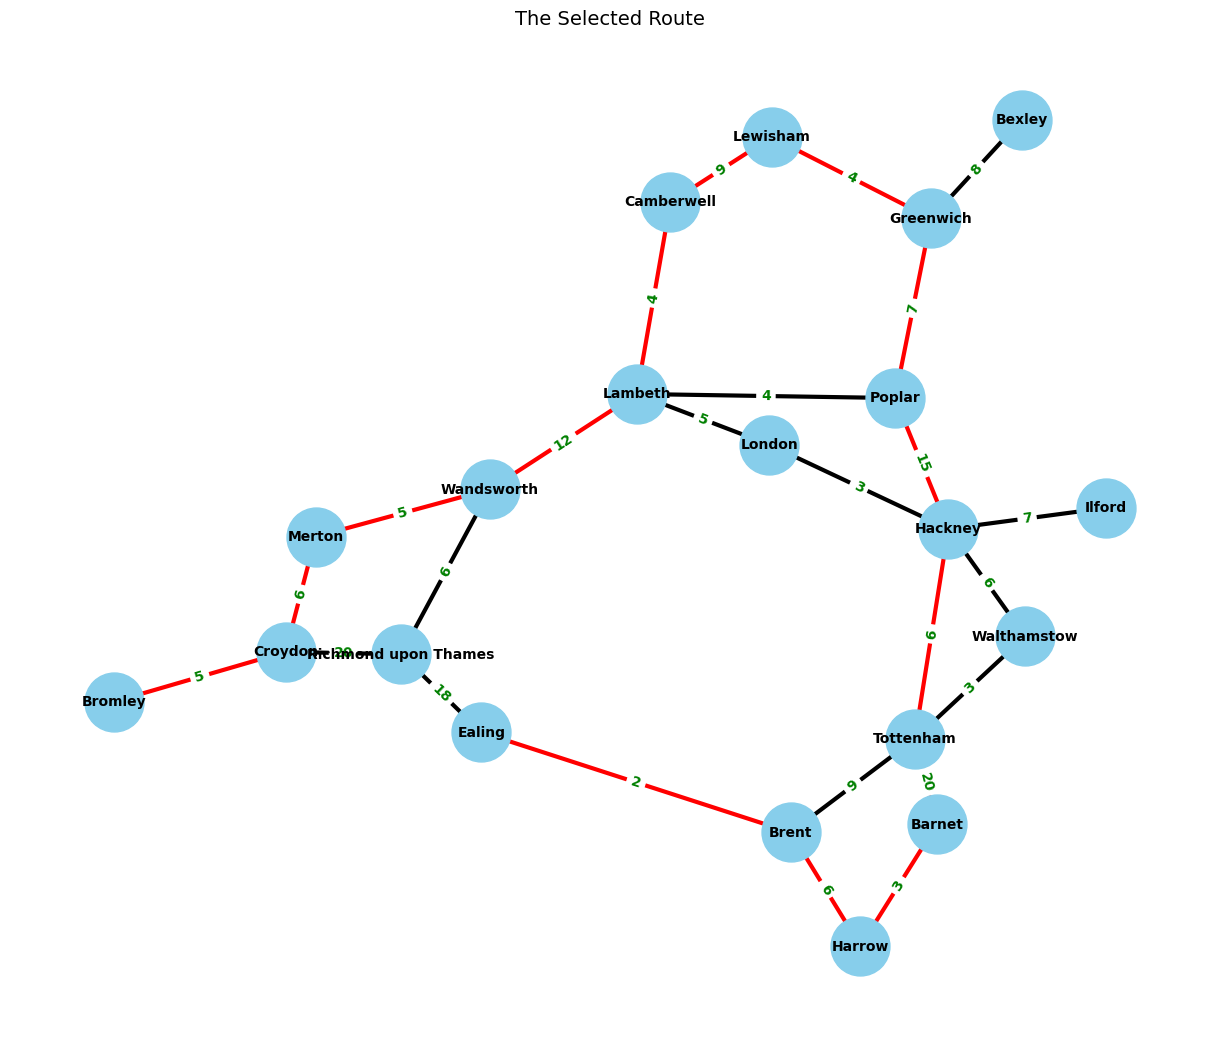

In [141]:
print(depth_first_search_visited(G, 'Bromley', 'Ealing'))
create_and_draw_graph(depth_first_search_visited(G, 'Bromley', 'Ealing'))

In [138]:
def breadth_first_search_visited(graph, start, goal):
    if start not in G.nodes:
        return 'The Start is not in the Graph'
    node = Node(start, [start])
    queue_list = [node]
    
    while queue_list:
        node = queue_list.pop(0)
        
        
        if node.name == goal:
                return node.path

        else: 
            for item in graph.neighbors(node.name): 
                if item not in node.path: 
                    node_path = node.path + [item] 
                    neighbor_node = Node(item, node_path)
                    queue_list.append(neighbor_node)
    return 'NOT FOUND'

In [139]:
print(breadth_first_search_visited(G, 'Bromley', 'GR'))
create_and_draw_graph(breadth_first_search_visited(G, 'Bromley', 'GR'))

NOT FOUND
Invalid path provided.


In [142]:
print(breadth_first_search_visited(G, 'ndj','Bromley'))
create_and_draw_graph(breadth_first_search_visited(G, 'hdui','Bromley'))

The Start is not in the Graph
Invalid path provided.


['Greenwich', 'Poplar', 'Hackney', 'Tottenham', 'Brent', 'Ealing']


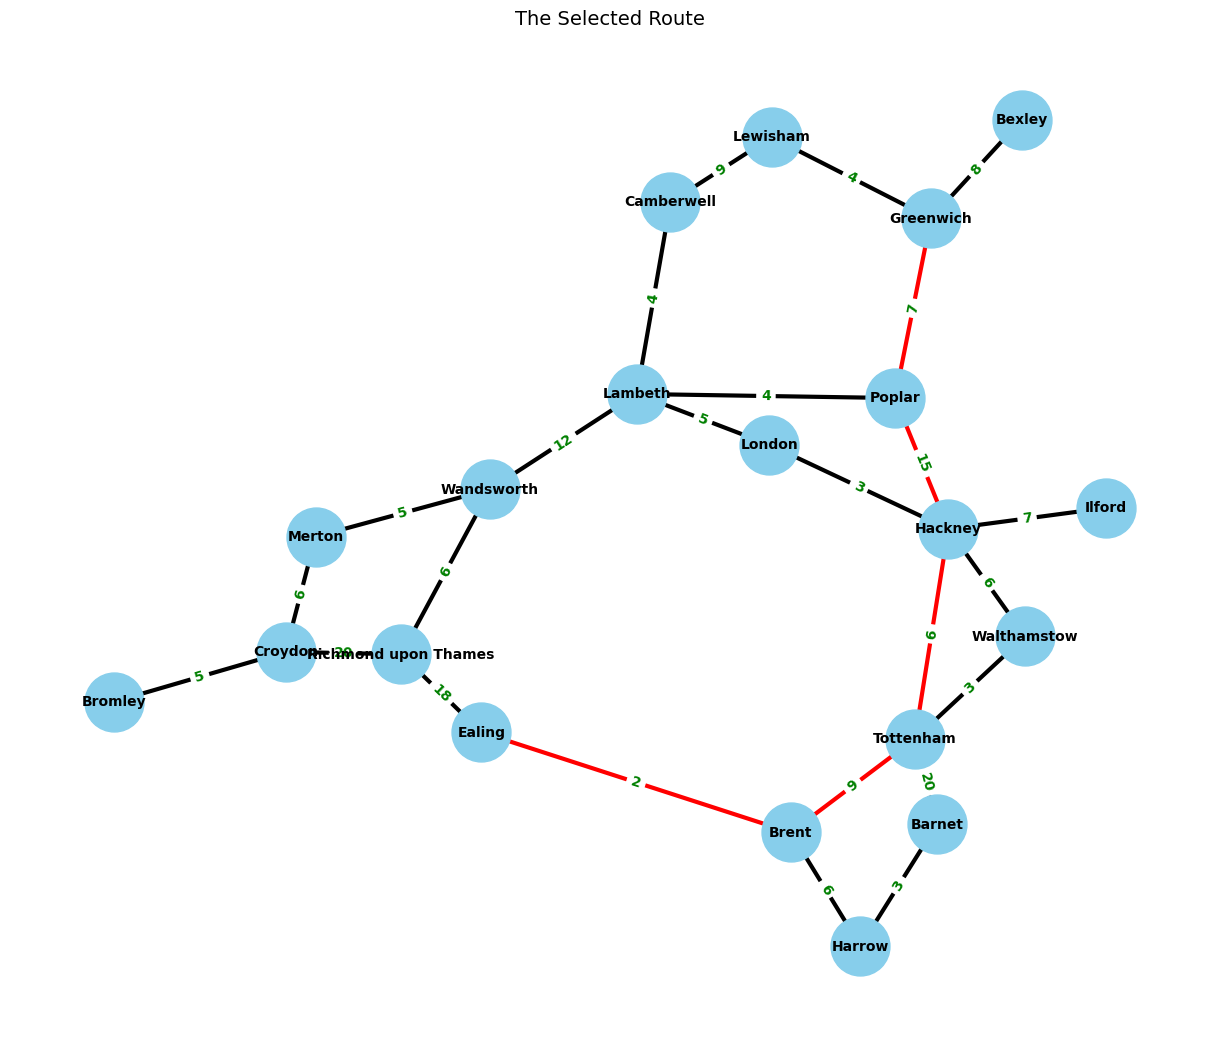

In [140]:
print(breadth_first_search_visited(G, 'Greenwich', 'Ealing'))
create_and_draw_graph(breadth_first_search_visited(G, 'Greenwich', 'Ealing'))

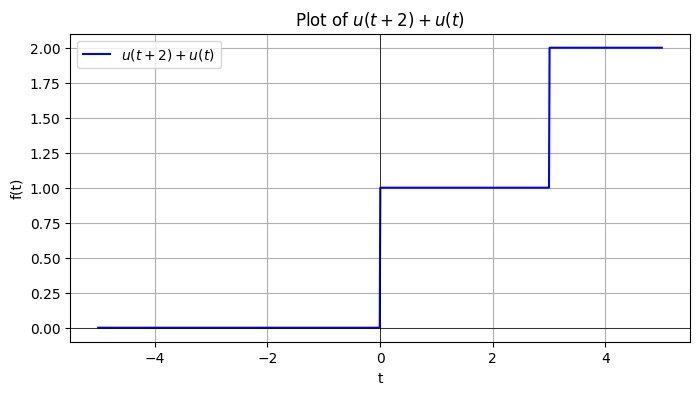

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the unit step function
def u(t):
    return np.where(t >= 0, 1, 0)

# Define the function u(t+2) + u(t)
def f(t):
    return u(t) + u(t-3)

# Create an array of t values
t = np.linspace(-5, 5, 1)
y = f(t)

# Plot the function
plt.figure(figsize=(8, 4))
plt.plot(t, y, label=r'$u(t+2) + u(t)$', color='b')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title(r'Plot of $u(t+2) + u(t)$')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True)
plt.legend()
plt.show()


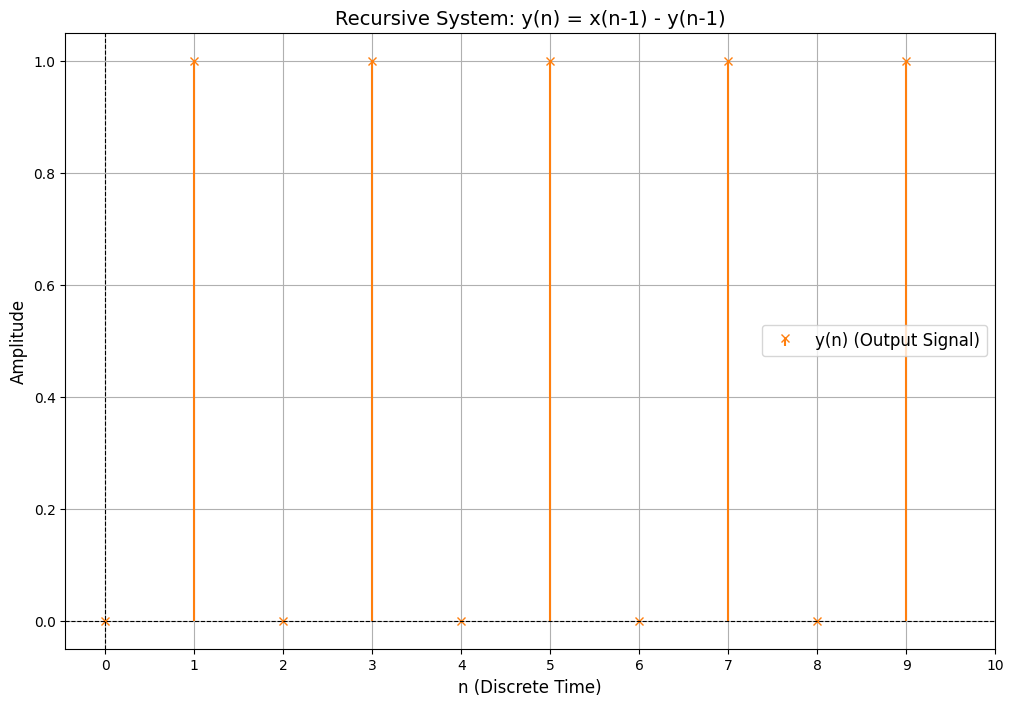

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define input signal x(n) as u(n) (unit step signal)
n = np.arange(0, 10)  # Define a range of n values
x = np.ones_like(n, dtype=float)  # Unit step signal: u(n)

# Initialize y(n)
y = np.zeros_like(n, dtype=float)  # Initialize y with zeros, same size as n

# Compute y(n) iteratively
for i in range(1, len(n)):  # Start from n=1 to avoid negative indices
    y[i] = x[i - 1] - y[i - 1]

# Plot the input and output signals
plt.figure(figsize=(12, 8))
# plt.stem(n, x, label='x(n) = u(n) (Unit Step Signal)', basefmt=" ", linefmt="C0-", markerfmt="C0o")
plt.stem(n, y, label='y(n) (Output Signal)', basefmt=" ", linefmt="C1-", markerfmt="C1x")

# Customize the plot
plt.title('Recursive System: y(n) = x(n-1) - y(n-1)', fontsize=14)
plt.xlabel('n (Discrete Time)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.xticks(np.arange(0, 11, 1))  # Show every 5th step on the n-axis
plt.legend(fontsize=12)
plt.grid(True)

# Add axis lines for clarity
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

# Show the plot
plt.show()


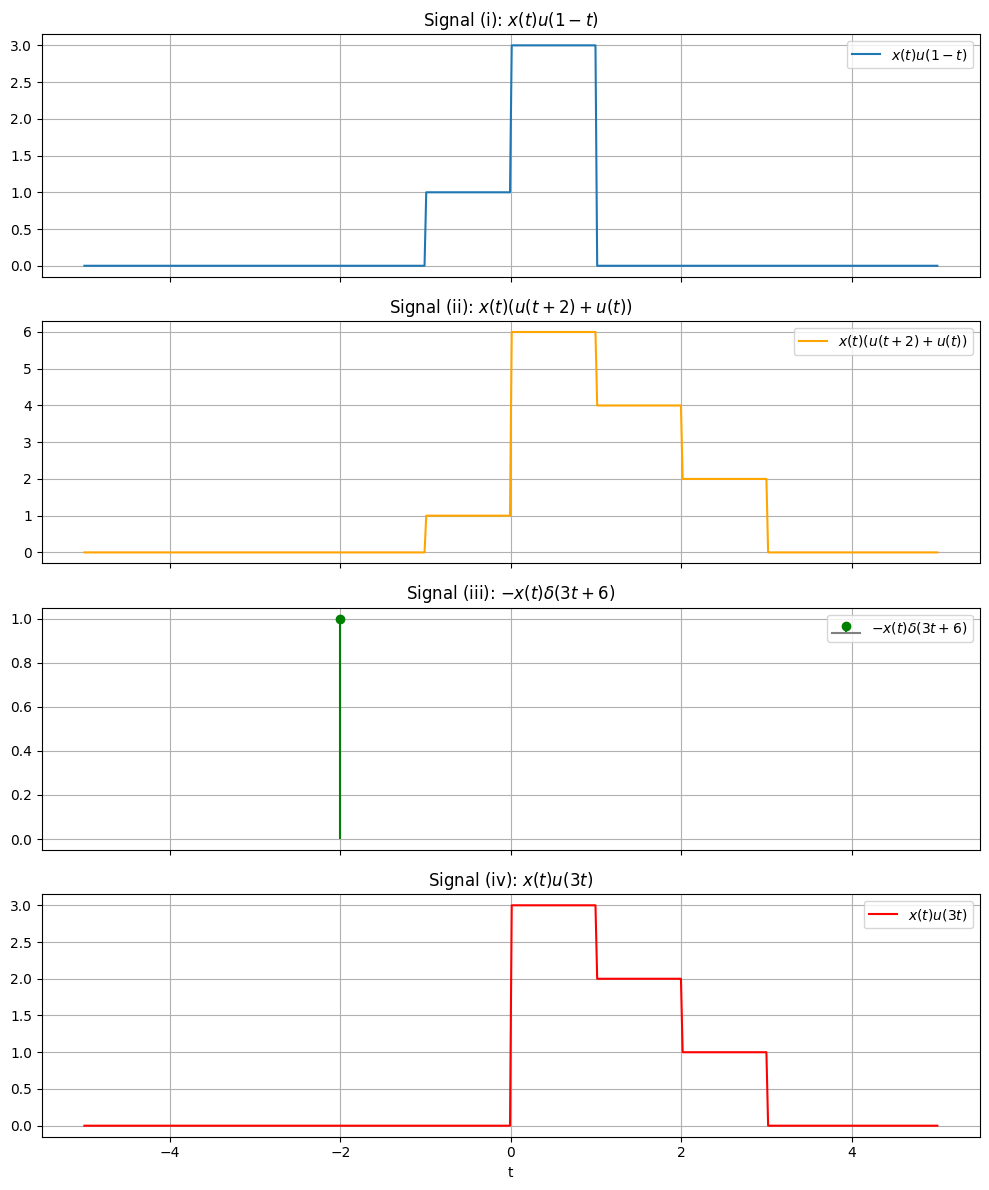

In [24]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Define symbols and step function
t = sp.symbols('t')
u = sp.Heaviside  # SymPy's Heaviside function represents the unit step function

# Define x(t) = u(t+1) + 2u(t) - u(t-1) - u(t-2) - u(t-3)
x_t = u(t + 1) + 2 * u(t) - u(t - 1) - u(t - 2) - u(t - 3)

# Define the new signals based on x(t)
# Signal (i): x(t) * u(1 - t)
y_i = x_t * u(1 - t)

# Signal (ii): x(t) * (u(t + 2) + u(t))
y_ii = x_t * (u(t + 2) + u(t))

# Signal (iii): -x(t) * delta(3t + 6)
y_iii = x_t * sp.DiracDelta(3 * t + 6)

# Signal (iv): x(t) * u(3t)
y_iv = x_t * u(3 * t)

# Convert symbolic expressions to numerical functions for plotting
t_vals = np.linspace(-5, 5, 500)  # Range of t values for plotting
x_t_func = sp.lambdify(t, x_t, "numpy")
y_i_func = sp.lambdify(t, y_i, "numpy")
y_ii_func = sp.lambdify(t, y_ii, "numpy")
y_iv_func = sp.lambdify(t, y_iv, "numpy")

# Plot all signals
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot (i)
axs[0].plot(t_vals, y_i_func(t_vals), label=r"$x(t)u(1-t)$")
axs[0].set_title("Signal (i): $x(t)u(1-t)$")
axs[0].grid(True)
axs[0].legend()

# Plot (ii)
axs[1].plot(t_vals, y_ii_func(t_vals), label=r"$x(t)(u(t+2) + u(t))$", color="orange")
axs[1].set_title("Signal (ii): $x(t)(u(t+2) + u(t))$")
axs[1].grid(True)
axs[1].legend()

# Plot (iii)
axs[2].stem([(-6/3)], [1], label=r"$-x(t)\delta(3t+6)$", linefmt="green", markerfmt="go", basefmt="gray")
axs[2].set_title("Signal (iii): $-x(t)\delta(3t+6)$")
axs[2].grid(True)
axs[2].legend()

# Plot (iv)
axs[3].plot(t_vals, y_iv_func(t_vals), label=r"$x(t)u(3t)$", color="red")
axs[3].set_title("Signal (iv): $x(t)u(3t)$")
axs[3].grid(True)
axs[3].legend()

# Set common labels
plt.xlabel("t")
plt.tight_layout()
plt.show()
